## TP Séparateurs à Vaste Marge
### 1 Données

In [1]:
import numpy as np
import breastcancerutils as b
x,y=b.load_breastcancer('wdbcM1B0.data')
x.shape

(569, 30)

### 2 Méthode du sous-gradient
#### Question 2.1
\begin{align*}
\min_{v\in R^m,a\in R,\xi\in R^n} \quad & \frac{1}{2}\sum_{j=1}^{m}v_j^2+c\sum_{i=1}^{n}\xi_i \tag{1} \\
   & \xi_i\geq 0,\ \forall i\in \{1,...,n\}  \\
   & \xi_i\geq 1-y_i(x_i^T v+a),\,\forall i\in \{1,...,n\}
\end{align*}
where c=1.
Let's define 
\begin{align*}
     f(\xi)= & c \sum_{i=1}^n \xi_i, \\   
   & \xi_i\geq 0,\ \forall i\in \{1,...,n\}  \\
   & \xi_i\geq 1-y_i(x_i^T v+a),\,\forall i\in \{1,...,n\}
\end{align*}
We have:
$$\frac{\partial f(\xi)}{\partial (\xi_i)}=c=1>0$$
So $$arg \min f(\xi_i)=\min \xi_i=\max (0,1-y_i(x_i^T v+a))$$
So the problem (1) becomes:
$$\min_{v\in R^m,a\in R}  \frac{1}{2}\sum_{j=1}^{m}v_j^2+c\sum_{i=1}^{n} \max (0,1-y_i(x_i^T v+a)) \tag{2}$$

#### Question 2.2


![title](1.jpg)

#### Question 2.3
We define 
\begin{align*}
 &M:R^p\times R \to R^n \quad (v,a) \to (y_i(<x_i,v>)+a))_{i=1}^n \\
&H:R^n \to R \quad (u_i)_{i=1}^n \to \sum_{i=1}^n \max(0,1-u_i),{where \quad u_i=M_i(v,a)}\\
&N:R^p\times R \to R^n \quad (v,a) \to \sum_{i=1}^m \frac{1}{2} v_i^2
\end{align*}
So we get:
\begin{align*}
&\partial f(v,a)=\partial N(v,a)+cM^T\partial H(M(v,a)) \\
&\partial N=v_1 \times v_2 \times ... \times V_m \times \{0\} \\
&\partial H=\partial h_1(y_i(<x_i,v>)+a)) \times ... \times h_n(y_n(<x_n,v>)+a))
\end{align*}

#### Question 2.4

In [2]:
def h(z):
    return max(0, 1-z)


def dh(z):
    if z < 1:
        return -1
    if z > 1:
        return 0
    return -np.random.random()


def f(v, a, x, y):
    result = 0
    n = y.size
    for i in range(v.size):
        result += v[i]**2/2
    for i in range(n):
        ui = y[i]*(np.dot(x[i], v)+a)
        result += h(ui)
    return result


def df(v, a, x, y):
    d1 = []
    for i in range(v.size):
        d1.append(v[i])
    d1.append(0)
    d1 = np.array(d1)
    n = y.size
    p = v.size
    u = np.zeros(n)
    u2 = []
    for i in range(n):
        u[i] = y[i]*(np.dot(x[i], v)+a)
        u2.append(dh(u[i]))
    u2 = np.array(u2)
    d2_a = 0
    d2 = np.zeros(p)
    for i in range(n):
        d2 += u2[i]*y[i]*x[i]
        d2_a += u2[i]*y[i]
    d2 = np.append(d2, d2_a)
    return d1+d2

#### Question 2.5

In [3]:
import matplotlib.pyplot as plt
v = np.zeros(30)
a = 0
time = 1000
loss = []
for i in range(time):
    step = 1/(i+1)
    gk = df(v, a, x, y)
    vt = gk[0:30]
    at = gk[30]
    v = v-step*vt
    a = a-step*at
    loss.append(f(v, a, x, y))
    print(f(v, a, x, y))

1342660.7300801538
330425.43539915426
144333.32720390407
79882.64470651692
51153.63046180325
35927.36535068072
26934.657072011003
21200.55931006957
17325.93983800699
14544.814437032934
12492.729423167699
10938.175131687942
9724.04667938568
8772.940219485952
7996.3773195499225
7355.123040384058
6828.111660571954
6385.4767268978685
6014.1106618714075
5691.976883657878
5409.109717142309
5167.806579670876
4959.086800249372
4773.758717942126
4606.37694534655
4455.345892822904
4317.84996711944
4192.880237309982
4076.581498858833
3967.950475851439
3866.134516522899
3770.781252999189
3680.5919086882996
3595.283974117988
3514.84789878099
3438.5562225038843
3365.882708384648
3296.6380646089005
3230.282750386847
3166.493373890891
3105.5093970441717
3046.6677930866085
2990.001655225171
2935.523698706806
2882.679620476906
2831.9986064145596
2782.9291055283834
2735.2588877021813
2689.36468981284
2644.7003596377454
2601.401112915271
2559.498011143913
2518.947405766251
2479.1776187871296
2440.96350193

195.54134335628962
194.82839680290894
194.10200964286835
193.43325923282393
192.759908599198
192.036132364242
191.37718731932065
190.70221306160866
189.99337771919397
189.3195388265911
188.693779803758
187.97817795788458
187.3128031817529
186.67672008955105
185.98468269032378
185.30617763943553
184.70188767326985
184.01803198549288
183.3439651058557
182.7570508080602
182.07497175172392
181.4074194432658
180.8196926744831
180.15158298518986
179.48617685151353
178.89199926828582
178.2540175947035
177.59623157394344
177.00604038229082
176.3842920263625
175.72825071359452
175.14202662244554
174.52099309350123
173.87788394057176
173.2724634854089
172.68824721425347
172.05229841845141
171.4773066699949
170.91839996350697
170.29975945252963
169.70640435514784
169.11546073711838
168.5520720883678
167.99213349417164
167.40921989271365
166.8379175292923
166.25862612668496
165.68164744108506
165.13209873556096
164.60474966647874
164.01496587829004
163.45181289335264
162.89265523272354
162.3290704

62.1447917787384
62.031859243209766
61.96942785383166
61.8299663630223
61.7072831745754
61.6084858725869
61.48811580310811
61.405580651460404
61.32780904428832
61.22294036471837
61.104535827788844
61.05753812644022
60.913486804341154
60.7921479933551
60.67586190903522
60.57635046889247
60.56151388906961
60.40550937226222
60.30708520325542
60.259050319193435
60.14708538519181
60.043268103382914
59.91515214214263
59.819830291074716
59.728084877941896
59.66328295745353
59.591075668350285
59.453535462092844
59.33525960111665
59.25800135815493
59.183160013624416
59.09531571350174
58.999204815185024
58.87615690946666
58.766805980536525
58.80674759187672
58.615352917408146
58.508958233196665
58.403010379999884
58.31212065990837
58.24205326153741
58.22032460080872
58.081085925495415
57.98429800850091
57.91692399683218
57.80940763950598
57.695748731280865
57.58750508402819
57.51696448773844
57.449828237063784
57.34843302763152
57.31132540938634
57.17810138347102
57.07316842521257
57.07362652172

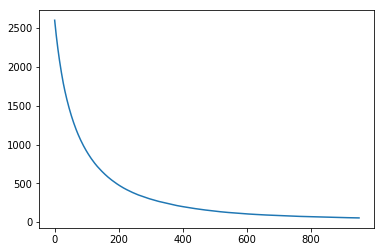

In [4]:
plt.plot(loss[50:])

In [5]:
print("After 1000 interations, the loss function is :", f(v, a, x, y))
print("Now the variable v is :\n", v)
print("The variable a is :", a)

After 1000 interations, the loss function is : 54.05703274872559
Now the variable v is :
 [ 1.54857585  0.84078615  1.4868395   0.37261924  1.39539165 -0.41294061
  0.80911012  1.21223198 -0.61389739 -1.24086304  1.78258813 -0.39833573
  0.45703727  0.29485046 -0.44241329 -0.8475442   0.21264803  1.78649606
 -0.72400566 -1.6828764   1.65866493  2.11096265  1.22697203  0.17252216
  0.78919941  0.19684341  1.58595193  1.63988907  1.68379391  0.11797488]
The variable a is : -2.244320454475963


### 3 Méthode du sous-gradient stochastique
#### Question 3.1
$$E[f_I(v,a)]=\sum_{i=1}^n P_i \times f_i(v,a)=\frac{1}{2}\sum_{j=1}^{m}v_j^2+c\sum_{i=1}^{n} \max (0,1-y_i(x_i^T v+a))=f(v,a)$$

#### Question 3.2
$$\partial f_i(v,a)=v_1 \times v_2 \times ... \times v_p \times \{0\}+n \cdot \partial h(u_i)\times \left(y_i x_i^T \ y_i\right)$$

#### Question 3.3

In [6]:
v = np.zeros(30)
a = 0
time = 10000
n = y.size
for i in range(time):
    step = 1/(i+1)
    rand = np.random.randint(0, n)
    gk = df(v, a, np.tile(x[rand], (n, 1)), np.ones(n)*y[rand])
    vt = gk[0:30]
    at = gk[30]
    v = v-step*vt
    a = a-step*at
    print(f(v, a, x, y))

5165582.978468496
1348892.114224862
624954.3853516907
778546.781360179
515440.0073375171
372633.7782349597
286826.16713461705
231362.4937719228
193804.56540037776
167498.4976252736
191518.28146216375
164931.2090585866
144361.59483139263
128268.3706307279
115506.39633779999
105190.17859178307
96803.40629528834
89902.06846955878
84193.82474779549
78603.24588332349
74793.43196934585
71675.72418301209
69098.50241595136
66999.62718826601
65268.057661521976
63857.82837570735
62700.08854207106
61811.10521629769
61150.75151198955
60640.58105918759
62014.76860369838
60988.43657870876
60418.062104538214
58802.70156494502
57395.42700582572
56172.31913156944
55109.18983770994
54189.980276160946
53391.91755759421
52684.13924666804
52070.144865951086
51556.35516184212
51170.235153987705
50857.72093391972
50609.519340229075
50426.23070165602
50313.24274454864
50252.09448925205
50266.23830854112
51371.333562737076
50971.386292780815
50633.182264526506
51582.827172721794
51291.95566899535
53238.1843880

25748.898530017428
25742.957221077268
25737.78931147609
25732.88405385764
25675.80462002785
25553.095223258235
25488.198371327537
25480.660068069312
25473.860613982997
25467.35527582727
25414.925950933964
25409.720878172153
25390.3928267416
25386.866368487725
25383.818215577183
25380.869522253986
25405.07029579859
25332.120217741347
25325.89201519393
25320.24404092935
25315.32938468741
25310.66595500796
25306.10844120554
25055.870588955728
25044.824633074273
25034.07009085634
25024.73781448677
25015.590078992733
24994.46404548368
24982.448421643363
24970.569275454352
24958.93135821098
25123.198587784886
25106.793364763183
25090.704761267687
25075.340764480417
25060.124687253574
24929.86462366549
24913.803843736394
24799.510121826224
24784.43199450345
24764.153237943327
24748.0192606732
24732.749478756214
24717.941963707384
24703.67675558951
24690.2443161707
24676.966980632253
24663.823801959497
24650.81351155104
24530.163374328156
24518.802567675393
24507.56575498049
24496.45175006376


20270.287144190566
20263.07898202431
20256.116331657828
20249.441580687653
20242.898643131317
20236.391739934872
20229.92068135931
20223.485278808508
20217.08534482128
20210.720693063526
20204.391138320294
20198.096496488135
20150.475227065475
20144.202469973538
20137.96427537277
20131.760462592683
20125.590852041718
20119.802594821056
20113.47910486944
20107.19013572514
20100.935508079212
20094.71504368729
20088.528565362205
20082.3758969668
20076.256863406736
20070.1712906233
20064.11900558642
20058.128640438146
20044.85618466025
20038.399410704216
20031.97659178831
20025.5875547257
20019.232127342628
20012.910138471718
20006.62141794511
20000.36579658768
19994.14310621041
19987.953179603734
19937.01643277117
19931.508535929534
19926.03169693632
19920.585755969176
19915.170554139037
19876.464682217746
19871.175122195178
19865.915532698476
19860.890762907537
19856.017458134476
19851.172980123323
19846.357179918654
19841.754777419654
19837.32134860708
19816.62983895318
19812.1540146214

17221.922438370235
17217.053736301197
17212.277508855666
17207.516983792622
17202.772107215293
17171.63273026043
17167.096356162627
17162.575247993744
17158.069353116738
17153.585187107365
17149.314119040784
17145.05780723609
17164.714301053853
17185.781248672214
17180.549350813988
17175.333685782134
17170.13419915265
17165.11547723306
17160.15082180057
17155.201886958686
17136.32374786856
17131.12642853414
17126.13734715382
17121.301478488764
17116.756536382192
17112.22662422625
17107.72304708101
17103.42416517823
17099.139868881684
17094.870108342722
17090.614833909574
17086.37399612649
17082.14754573277
17077.9354336619
17073.73761104077
17069.55402918857
17065.384639616153
17061.229394024947
17057.08824430626
17052.961142540273
17048.848040995315
17044.748892126896
17040.663648576883
17082.48047976847
17077.701043097797
17072.955006213542
17068.403418825732
17063.86635357773
17059.34376216293
17054.835596461726
17050.341808540736
17045.8623506519
17041.39717523169
17059.44745464773

15279.28567862801
15277.701205939746
15276.122480663915
15274.549486574617
15272.98220749677
15271.420627305915
15269.864729928046
15268.314499339405
15266.769919566339
15259.28375277088
15259.121356727435
15257.204757138217
15255.294264132504
15253.389860975902
15251.49153098563
15249.599257530246
15247.713024029561
15245.83281395442
15243.958610826492
15242.09039821813
15240.228159752174
15238.371879101782
15236.521539990235
15234.677126190794
15232.838621526469
15231.006009869914
15229.179275143184
15227.358401317602
15225.66013142637
15223.992186534912
15222.329900037157
15220.673256353783
15199.314715155018
15197.656935793715
15196.004778221704
15194.358226988887
15192.852953950718
15176.924860240937
15175.262602722732
15160.409007626811
15158.45765485149
15156.51222590699
15154.625996499472
15152.832075174068
15151.043878366701
15149.261390601423
15147.484596449262
15145.713480527997
15143.948027502027
15142.188222082244
15140.43404902581
15131.099654578302
15129.32164805459
1512

14142.70736783799
14141.704676819923
14140.7051657145
14139.708827202294
14116.481703624178
14127.502630734698
14126.023547501245
14124.548086571354
14123.07624002425
14121.607999958731
14120.14335849321
14118.682307765484
14117.2368163631
14115.891501226717
14114.549656844581
14113.218089263655
14096.865373503002
14095.520924522787
14094.17993784564
14092.842405847628
14087.20627865832
14085.529150875782
14083.919484620594
14082.404859406692
14080.954533923314
14079.507747476831
14078.136803823198
14068.255296651714
14066.792610678947
14065.333476451971
14063.87788627762
14062.425832481507
14060.97730740809
14059.532303420523
14058.09081290068
14056.758026011448
14055.430644197966
14054.106658868735
14047.07821741378
14033.136885353879
14031.685224725956
14030.237073106755
14028.792422934433
14027.351266665544
14025.91359677505
14024.47940575622
14023.048686120617
14021.665065971212
14020.347616434548
14019.03352283983
14017.722777893368
14006.692043811274
14005.476049959052
14004.263

13242.512502844304
13242.066274979723
13241.62180813375
13241.179098744477
13240.738143257615
13240.298938126574
13217.696748366425
13217.252885247279
13205.63320211244
13205.174582516309
13204.717735400009
13195.1294690232
13194.669077146387
13194.210455782675
13196.980098866816
13196.420924043807
13195.863594574019
13195.308106817676
13194.75608181008
13194.289948055872
13193.82558174479
13193.362979338212
13192.902137305105
13192.443052121997
13191.985720272913
13191.530138249396
13191.076302550497
13190.62420968272
13190.173856160056
13189.725238503883
13189.27835324306
13188.833196913798
13188.389766059709
13187.948057231792
13187.50806698835
13168.737675592638
13168.293281364215
13167.850607720931
13155.140508705026
13154.683782469581
13132.811975724691
13132.352043066327
13131.893850029765
13131.437393158081
13130.982669001729
13130.52967411847
13130.078405073356
13129.628858438704
13129.181030794114
13128.734918726423
13128.290518829692
13127.847827705193
13127.452412328737
131

12286.21336323203
12285.813074992637
12285.436512604285
12285.061214185327
12284.6871775432
12284.314400489391
12283.942880839457
12283.57261641297
12283.203605033525
12274.182942537318
12273.811576455955
12273.441462171611
12273.072597516837
12272.704980328192
12272.3386084462
12249.92695176149
12249.554896583419
12249.18409244008
12248.814537169597
12248.446228614102
12248.079164619654
12247.713343036317
12247.348761718087
12246.98541852293
12246.623311312727
12246.262437953299
12245.902796314409
12245.544384269715
12245.187199696786
12238.948329581479
12238.508988216425
12238.115062295688
12237.748018761347
12229.925552309685
12229.483462810933
12229.042656122092
12228.603130074089
12228.22391110433
12227.856480566208
12227.490280227825
12227.125307977514
12213.249227396118
12203.253545936685
12202.884191037754
12202.516065368074
12202.14916682194
12201.783493297482
12201.41904269665
12201.055812925259
12185.371755186969
12184.999824332186
12184.6291225139
12184.259647632465
12183.8

11555.477197784185
11545.49953328761
11545.040269500876
11544.582024688083
11544.124797352064
11543.668585998024
11543.213389133554
11542.759205268654
11533.724189684564
11533.26916131902
11532.815144302473
11532.362137151034
11531.910138383226
11531.459146519905
11531.009160084312
11522.560039681894
11522.105627571409
11521.65222316945
11521.199825000458
11520.7484315912
11520.298041470813
11515.52356617259
11515.064643344136
11514.606730099711
11514.149824964796
11502.686125859298
11502.228640236943
11501.772161188195
11501.316687244303
11500.862216938873
11498.093612692446
11497.571025972142
11497.049482671986
11496.52898129369
11496.009520341418
11495.491098321609
11494.97371374312
11494.45736511711
11493.942050957117
11493.42776977902
11484.355749148779
11483.837385706856
11483.320057264664
11482.803762339488
11482.288499450971
11481.774267121069
11481.261063874063
11480.748888236543
11480.237738737449
11479.727613907997
11470.933256380597
11470.42050406427
11467.727844986188
1146

10927.208278104888
10926.649193602801
10926.090960327047
10920.486804435031
10919.926597255238
10919.367241241502
10918.808735333732
10913.753970344382
10913.190372163815
10912.627627058007
10912.065733966087
10911.504691828673
10906.309295986839
10905.69316633912
10905.077915437274
10904.463542202682
10903.850045558218
10886.561717774257
10878.523467614257
10877.915927791897
10876.478647884625
10872.41836461173
10871.751986126026
10871.086508632865
10870.421931040955
10869.758252260483
10869.095471203156
10868.433586782152
10867.772597912133
10867.112503509285
10866.453302491238
10865.794993777115
10865.13757628754
10854.41501547721
10853.757365443267
10853.10060551913
10852.444734628913
10851.789751698192
10849.152889867626
10848.543997145327
10847.935969002438
10847.328804384078
10846.722502236831
10846.117061508692
10845.512481149106
10844.908760108987
10844.305897340642
10843.622018253052
10842.966051802727
10842.310969062368
10841.65676896779
10841.003450456252
10840.351012466439

10366.499590334734
10365.997150696765
10365.495371165067
10364.994251004824
10364.493789482147
10363.993985864061
10363.494839418503
10362.996349414318
10362.498515121275
10362.00133581006
10361.504810752249
10361.008939220344
10360.513720487737
10360.053128117186
10359.61222065626
10359.205856011926
10358.800102518155
10358.394959478795
10357.990426198538
10357.586501982987
10357.183186138598
10356.780477972721
10356.378376793558
10355.606382782838
10355.11243616924
10354.619137928572
10354.00699681485
10353.465336202633
10352.92434593724
10352.384025285215
10351.844373514008
10343.237101990548
10342.699176623062
10342.16191760704
10341.625324213872
10341.124223323455
10331.496673776224
10331.091719385053
10330.687370181642
10330.283625480144
10329.880484595604
10329.477946843892
10329.076011541754
10328.67467800678
10328.273945557423
10327.87381351299
10327.474281193636
10327.075347920365
10326.677013015036
10326.279275800354
10325.882135599872
10325.485591737985
10325.08964353994
10

9955.321433609732
9954.965710312234
9954.610469819252
9954.255711630143
9953.901435244841
9953.547640163879
9953.194325888304
9952.841491919802
9952.489137760596
9952.137262913475
9951.785866881819
9956.339094202753
9955.945161909429
9947.805242160519
9944.455012636285
9944.057573225042
9943.660632047593
9943.264188595995
9942.868242362882
9942.472792841463
9942.07783952553
9941.68338190943
9941.289419488108
9940.895951757073
9940.50297821241
9940.110498350783
9939.718511669402
9939.327017666086
9938.936015839194
9938.54550568767
9938.155486711026
9937.765958409338
9937.376920283245
9936.988371833959
9936.600312563263
9936.212741973488
9935.825659567558
9937.485552576369
9937.094787737928
9937.897296316523
9937.502286695726
9937.107769289949
9936.713743599988
9936.320209127221
9935.927165373596
9927.782991095264
9927.387155808534
9926.991812822907
9926.59696163978
9926.202601761117
9925.808732689446
9925.415353927852
9925.022464979984
9924.630065350042
9924.238154542802
9912.4574671855

9545.00304567744
9544.678842009986
9544.355030655232
9544.031611243074
9543.70858340379
9543.385946768045
9543.063700966895
9542.741845631783
9542.420380394518
9542.09930488732
9541.778618742783
9541.458321593884
9541.13841307399
9539.62219553932
9539.299401410808
9538.976997146618
9532.943822172532
9532.619890864366
9532.296349957971
9531.973199086222
9531.650437882354
9526.562456444957
9520.933650474459
9512.40359933592
9512.079810817895
9511.75641191757
9511.433402269036
9511.110781506764
9506.459394937108
9506.134109895977
9505.809215026391
9505.484709962406
9505.16059433847
9504.836867789383
9504.513529950356
9504.19058045696
9503.868018945155
9503.54584505128
9503.224058412043
9498.99390755985
9498.669315464593
9498.345111985573
9498.021296759021
9497.697869421569
9497.374829610202
9497.052176962305
9496.729911115635
9496.408031708308
9496.08653837884
9491.943387145733
9491.619703287948
9491.29640641118
9490.97349615384
9490.650972154703
9490.328834052938
9490.00708148809
9489.68

9155.52837999916
9155.207522495051
9154.887001508936
9154.566816752314
9154.246967936959
9153.927454774908
9153.608276978492
9141.027715741107
9140.743711490311
9140.460028875032
9140.17666761585
9139.893627433603
9139.610908049373
9136.688448249663
9136.37301718482
9136.057918320581
9135.743151372437
9133.362014809616
9128.377311620563
9128.028880898588
9127.680793982927
9127.33305058316
9126.985650409104
9126.638593170885
9113.137587412368
9112.732279309854
9112.327333320334
9111.922749144822
9111.518526484542
9111.114665041072
9105.711690311033
9105.30590034813
9104.900472462314
9104.50745733816
9104.140700028507
9103.796348533297
9103.452337558308
9103.108666816366
9102.765336020559
9102.422344884266
9102.079693121104
9101.737380445005
9101.39540657013
9101.053771210933
9100.71247408213
9100.371514898725
9100.030893375964
9099.690609229383
9099.350662174775
9099.011051928219
9098.67177820604
9098.332840724835
9088.835022405221
9088.437263706246
9088.039860616285
9087.64281284273
90

8776.258848232736
8775.922026642585
8775.585495866198
8775.24925567836
8774.913305854043
8774.577646168433
8774.242276396883
8773.907196314965
8773.572405698445
8773.237904323281
8772.903691965625
8772.569768401843
8772.236133408473
8771.90278676225
8771.56972824013
8771.236957619241
8770.904474676907
8766.862554876103
8766.529649444074
8766.197031569263
8765.86470102941
8765.532657602453
8765.200901066522
8764.86943119994
8764.538247781235
8764.207350589098
8763.876739402456
8763.546414000399
8763.216374162212
8762.886619667383
8762.557150295605
8762.227965826723
8758.898357308897
8758.568443190095
8758.238814014621
8757.90946956265
8757.580409614544
8757.251633950855
8756.92314235233
8756.594934599902
8756.267010474701
8755.939369758053
8755.612012231464
8755.291662746427
8751.323727071422
8751.003023021067
8750.702781939182
8750.402815033816
8750.103122091245
8749.803702897918
8744.425986635792
8744.098544735642
8743.771385391121
8743.44450838478
8743.117913499338
8742.79160051771
8

8469.28495932955
8468.973561459572
8468.662409219605
8468.35150243314
8466.239753963131
8465.951782164515
8461.04148227842
8453.791192337394
8453.478952025534
8451.043637985927
8450.754164297092
8450.464930115051
8450.175935266067
8449.887179576517
8449.59866287294
8449.31038498201
8449.023222281026
8448.760037675347
8448.497084129518
8448.23436147396
8446.120008343674
8444.712587492148
8444.397840406902
8444.083339752127
8443.769085351494
8443.4550770288
8443.390851783479
8443.074673879963
8442.75874286544
8442.443058563445
8442.127620797653
8441.8124293919
8441.497484170148
8441.182784956502
8440.868331575224
8429.797742125404
8429.511391286786
8429.2252770015
8428.939399098503
8428.653757406888
8428.368351755902
8428.083181974922
8427.79824789346
8424.669419188946
8424.38363763554
8425.356606680267
8425.044041779473
8424.731720937758
8424.419643981071
8424.107810735468
8423.796221027183
8423.484874682563
8423.173771528114
8422.862911390474
8422.552294096417
8422.24191947287
8421.931

8217.68523834534
8217.418739644903
8217.152442937784
8218.800658201399
8218.53224753672
8218.264039594105
8217.996034236745
8214.66025913122
8214.391310144252
8214.122564015635
8213.85402060855
8213.585679786313
8213.317541412325
8213.049605350085
8212.781871463209
8212.514339615425
8212.24700967054
8211.979881492483
8208.458712708138
8208.190946441471
8207.923382054625
8213.207882167273
8212.938050652463
8212.668421692906
8205.493319527675
8194.921298526626
8190.903082687122
8190.611105304142
8190.319336617329
8190.0277764879465
8185.929702892387
8185.637237950773
8185.344981848453
8185.052934446688
8184.761095606841
8184.469465190385
8184.178043058904
8183.886829074081
8183.124924620813
8182.832156920574
8179.610541701679
8179.317133346338
8179.023933892785
8178.730943202483
8178.438161136992
8178.145587557997
8177.85322232726
8177.561065306671
8177.269116358214
8176.977375343978
8176.685842126149
8176.394516567039
8176.103398529035
8175.81248787466
8175.521784466507
8175.23128816729

7932.411906164105
7932.122893697856
7929.3408420241485
7929.030610548572
7928.720573328303
7928.410730243711
7928.101081175254
7927.791626003468
7927.48236460898
7927.17329687249
7926.864422674795
7926.57161474806
7926.283750887368
7925.996074877193
7925.7085866007255
7925.421285941255
7925.134172782133
7924.847247006813
7924.56050849882
7924.274759756445
7924.008999691384
7923.743421224079
7923.749697999876
7923.441346945231
7923.133188636245
7922.825222954497
7919.691346798104
7919.383063903274
7919.07513078637
7918.767390062079
7918.459841612258
7918.162393648799
7917.875781661343
7917.599305234165
7917.333613337974
7917.068102535623
7916.802772713568
7916.537623758359
7916.272655556611
7916.007867995031
7916.509453021976
7916.201906699624
7914.944962321568
7914.636156324067
7914.327542607579
7913.0423358080525
7912.73308518191
7912.424026905748
7912.115160861792
7911.806486932366
7911.498004999873
7911.189714946781
7910.8816166556635
7910.573710009172
7910.265994890022
7909.9584711

7695.530870450658
7695.253666377031
7694.976628547424
7697.597337069861
7697.299995724046
7697.002825559892
7696.705826478628
7696.408998381573
7696.112341170094
7695.8158547456305
7695.519539009694
7695.223393863846
7694.927419209721
7694.631614949027
7694.33598098352
7694.04051721504
7693.7452235454875
7693.450099876814
7693.155146111053
7692.8603621503
7692.565747896709
7692.271303252504
7691.977028119974
7691.682922401467
7682.693663633493
7682.420106068526
7682.14671254674
7681.87348297264
7681.600417250832
7675.903994709531
7675.631404155224
7675.358977141227
7675.086713572388
7674.814613353618
7674.542676389893
7674.270902586251
7673.9992918478
7673.7278440797
7670.469950888349
7670.198330679499
7670.261911794378
7669.988860681162
7669.715973010179
7671.724774495083
7671.4503382772855
7671.176065946472
7670.901957407521
7670.628012565373
7670.35423132504
7667.20713526253
7666.93315768066
7666.659343640703
7666.385693047804
7666.112205807176
7665.838881824079
7665.565721003853
76

7448.148614271627
7447.868581165024
7444.985136647842
7444.7049919865385
7444.424997617381
7444.145153458601
7443.868785948189
7443.606835926634
7443.345031804847
7443.083373502696
7442.821860940062
7442.560494036913
7441.12418812648
7440.862424035665
7440.600805617303
7440.339332791437
7440.0780054781535
7439.816823597577
7439.5557870698985
7439.294895815354
7439.034149754228
7438.773548806859
7438.513092893633
7438.252781934994
7437.992615851421
7433.75927798225
7433.48141325632
7433.2036974276825
7432.926130415521
7432.648712139058
7432.371442517565
7432.094321470384
7431.817348916881
7428.625992196259
7428.383783777133
7428.141715784047
7427.89978813926
7427.658000765067
7427.416353583802
7427.174846517868
7426.933479489712
7426.692252421813
7426.451165236719
7426.329753998999
7426.052544161058
7425.775976249392
7425.516548013548
7425.257263848834
7425.010268407815
7424.21753728091
7423.975203672138
7423.733010158468
7423.490956662484
7423.24904310684
7423.007269414216
7422.7656355

7221.251797966561
7215.967241864172
7215.7337158118935
7215.500315846243
7215.267041901057
7215.033893910214
7214.800871807618
7214.56797552723
7214.335205003044
7214.102560169084
7213.870040959437
7213.637647308199
7213.405379149535
7213.173236417633
7212.941219046723
7212.709326971077
7212.477560125002
7212.245918442856
7210.604204161182
7210.372087730999
7210.140096537258
7209.908230514346
7209.676489596675
7209.444873718716
7209.213382814974
7208.463829507979
7208.231631424525
7207.999558468395
7207.767610574095
7207.535787676158
7207.30408970916
7207.072516607726
7206.841068306502
7206.609744740182
7204.923257979235
7204.674954907507
7204.426780306267
7204.1787341090185
7203.930816249309
7203.683026660722
7203.435365276894
7203.187832031491
7203.522038159355
7203.257160382244
7202.9924145927025
7202.727800723165
7202.463318706107
7202.198968474038
7201.934749959515
7201.670663095126
7201.406707813508
7201.142884047332
7200.8791917293165
7200.615630792206
7200.352201168799
7200.088

7043.864424432896
7043.657116010882
7043.449916367491
7043.242825448113
7043.035843198171
7042.828969563114
7042.622204488425
7042.4155479196215
7042.208999802248
7042.002560081883
7041.796228704143
7041.59000561465
7041.383890759094
7041.177884083164
7040.971985532597
7040.766195053161
7040.560512590652
7040.354938090894
7040.149471499749
7039.288915697038
7039.0825733931415
7038.876339234097
7038.670213165718
7038.464195133826
7038.258285084297
7038.052482963027
7037.846788715945
7037.64120228901
7035.724219653894
7035.517996056535
7035.31188043907
7035.105872747434
7034.899972927595
7034.694180925554
7034.48849668734
7034.282920159022
7034.077451286683
7029.723201938734
7029.533249307231
7028.4356591940705
7028.229887720472
7028.024223906496
7027.818667698305
7027.613219042077
7027.40787788403
7027.202644170415
7026.997517847505
7026.792498861614
7026.587587159083
7026.3827826862735
7024.381661378399
7024.176661034418
7023.971767898506
7023.766981917093
7023.56230303664
7023.3577312

In [7]:
print("After 10000 interations, the loss function is :", f(v, a, x, y))
print("Now the variable v is :\n", v)
print("The variable a is :", a)

After 10000 interations, the loss function is : 6880.55953188283
Now the variable v is :
 [ 18.38016425  22.08078646  17.60719236  11.90572634   9.16906122
   3.58067717  10.06734746  14.88809855   2.44941354 -17.07329708
   7.31727305  -4.29565696   4.79880443   2.1464996   -7.21374181
  -5.82356657   2.77299348  12.65048012  -7.26662727 -10.85628506
  19.21313103  27.52328491  18.08989005  10.52244765  16.78075427
   9.63897279  19.62542395  25.34060635  19.01510777   5.20496961]
The variable a is : -142.9458855016167


### 4 Méthode du lagrangien augmenté
#### Question 4.1

We could write the lagrangien form like:
$$L_p(v,a,\xi,\phi,\psi)=\frac{1}{2}||V||_2^2+c\sum_{i=1}^n \xi_i + \sum_{i=1}{n}<\phi,-\xi_i>+\frac{p}{2}||\xi||_2^2 +\sum_{i=1}^n <\psi,1-y_i(x_i^T v+a)-\xi_i> + \frac{p}{2}||1-y_i(x_i^T v+a)-\xi_i||_2^2 $$
and we have $$\phi \ge 0,\psi \ge 0 $$
Then we get:

\begin{align*}
\sum_{i=1}^{n}<\phi,-\xi_i>+\frac{p}{2}\|\xi\|_2^2 = & <\phi,-\xi>+\frac{1}{2p}\|p\xi+\phi-\phi\| \\
= & <\phi,-\xi> + \frac{1}{2p}||p\xi+\phi||_2^2 -\frac{1}{p}<p\xi+\phi,\phi>+\frac{1}{2p}||\phi\|_2^2 \\
= & \frac{p}{2}||\xi+\frac{\phi}{p}||_2^2-<\frac{\phi}{p},\phi>+\frac{1}{2p}||\phi\|_2^2 \\
= & -\frac{1}{2p}||\phi\|_2^2  +\frac{p}{2}||\xi+\frac{\phi}{p}||_2^2
\end{align*}

So we could transform the problem as:

$$L_p(v,a,\xi,\phi,\psi)=\frac{1}{2}||v||_2^2+c\sum_{i=1}^n \xi_i + \sum_{i=1}^{n}<\phi,-\xi_i>+\sum_{i=1}{n}g(-\xi_i,\phi_i)+\sum_{i=1}^{n}g(-\xi_i+1-y_i(x_i^T v+a),\psi_i)$$

#### Question 4.2 
\begin{align*}
&\nabla _x g(x,\phi)=p \cdot max (0,x+\frac{\phi}{p}) \\
&\nabla _\phi g(x,\phi)=-\frac{\phi}{p}+max(0,\frac{\phi}{p})=max(-\frac{\phi}{p},x)
\end{align*}


#### Question 4.3
\begin{align*}
&\nabla _x^2 g(x,\phi)=p >0 \\
&\nabla _\phi^2 g(x,\phi)=-\frac{1}{p}<0
\end{align*}
<center> So $x \to g(x,\phi) $ is convex and $\phi  \to g(x,\phi) $ is concave </center>

#### Question 4.4

In [8]:
def get_argmin_Lp(v, a, s, lamda1, lamda2, time):
    if time > 10000:
        return v, a, s
    n = y.size
    flag = 0
    step = 0.001
    Lp_a = 0
    Lp_v = np.zeros(v.size)
    Lp_v = Lp_v+v
    Lp_s = np.zeros(n)
    for i in range(n):
        u = -s[i]+1-y[i]*(np.dot(x[i], v)+a)
        Lp_a += -y[i]*2*max(0, u+lamda2[i]/2)
        Lp_v += -y[i]*x[i]*2*max(0, u+lamda2[i]/2)
        Lp_s[i] = 1-2*max(0, -s[i]+lamda1[i]/2)-2*max(0, u+lamda2[i]/2)
    value = [Lp_a, np.linalg.norm(Lp_v), np.linalg.norm(Lp_s)]
    loss = np.linalg.norm(value)
    #print(u, value, loss)
    #print("Nest iteration....")
    if loss <= 1:
        flag = 1
    #    print("Congratulation !!!  You have got the answer!")
     #   print(u, value, loss)
        return v, a, s
    else:
        v = v-step*Lp_v
        a = a-step*Lp_a
        s = s-step*Lp_s
        return get_argmin_Lp(v, a, s, lamda1, lamda2, time+1)

In [9]:
n = y.size
p = 30
v = np.random.rand(p)
a = np.random.random()
s = np.random.rand(n)
lamda1 = np.zeros(n)
lamda2 = np.zeros(n)
#time = 100
[v,a,s]=get_argmin_Lp(v,a,s,lamda1,lamda2,0)

#### Question 4.5

In [10]:
def Lp_lamda(v, a, s, lamda1, lamda2):
    Lp_1 = lamda1
    Lp_2 = lamda2
    n = y.size
    for i in range(n):
        u = -s[i]+1-y[i]*(np.dot(x[i], v)+a)
        Lp_1[i] += 2*max(-s[i], -lamda1[i]/2)
        Lp_2[i] += 2*max(u, -lamda2[i]/2)
    return Lp_1, Lp_2

#### Question 4.6

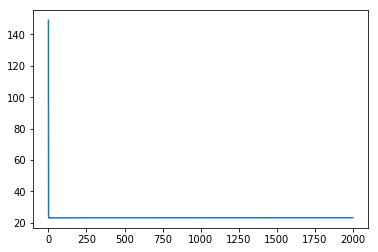

In [11]:
v = np.random.rand(p)
a = np.random.random()
s = np.random.rand(n)
lamda1 = np.zeros(n)
lamda2 = np.zeros(n)

def g(x, y):
    g = -1/4*(y**2)+(max(0, x+1/2*y))**2
    return g

def Loss_lagrangien(v, a, s, lamda1, lamda2):
    L = 1/2 * np.linalg.norm(v)+1*sum(s)
    g1 = 0
    g2 = 0
    for i in range(n):
        g1 += g(-s[i], lamda1[i])
        g2 += g((-s[i]+1-y[i]*(np.dot(x[i], v)+a)), lamda2[i])
    L += g1+g2
    return L

L = []
for i in range(2000):
    [v, a, s] = get_argmin_Lp(v, a, s, lamda1, lamda2, 0)
    lamda1, lamda2 = Lp_lamda(v, a, s, lamda1, lamda2)
    L.append(Loss_lagrangien(v, a, s, lamda1, lamda2))
plt.plot(L)

## 5 Comparaison


### Question 5.1 

<ul>
    <li>The Augmented Lagrangian Method <B>converges fastest</B> and gets the <B>best optimization result</B>.</li><br>
    <li>The Stochastic Sous-Gradient Method converges <B>faster</B> but gets <B>worse </B>optimization result than the Sous-Gradient Method beacase the Stochastic Sous-Gradient Method uses a subgradient of the function instead of its gradient.
</ul>